Basic info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997

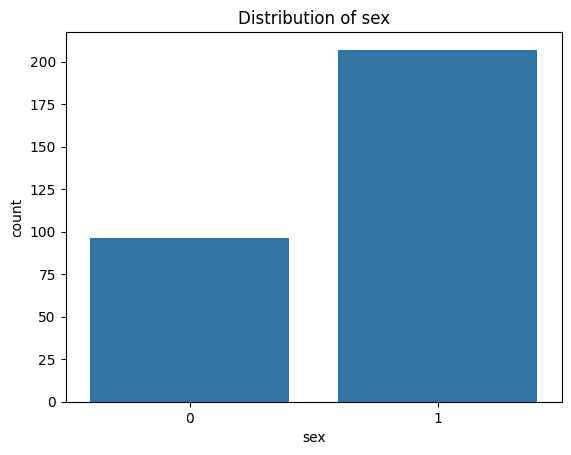

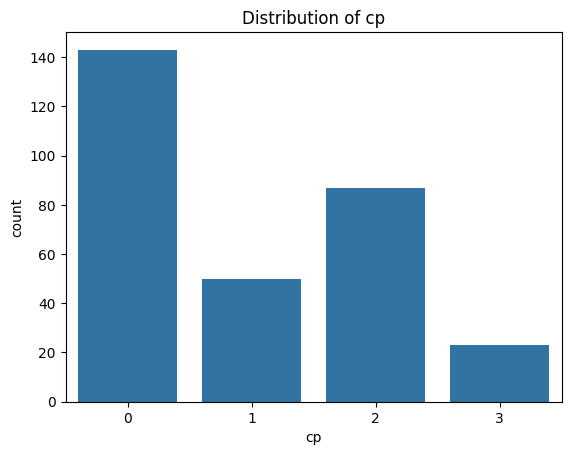

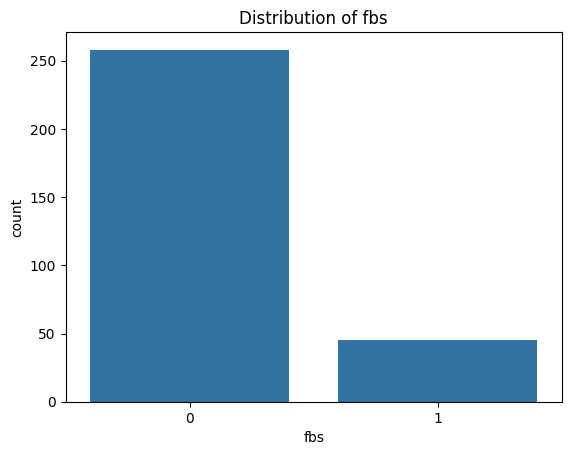

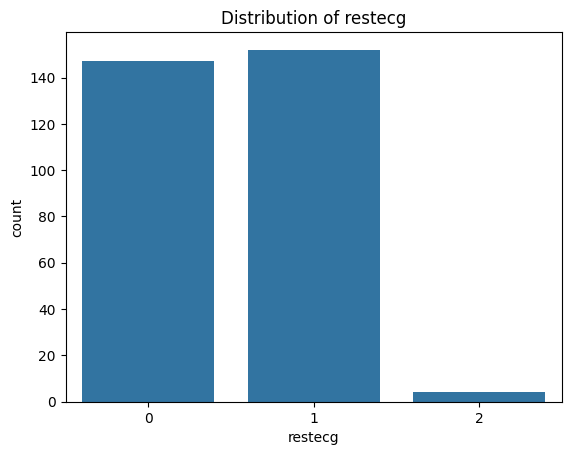

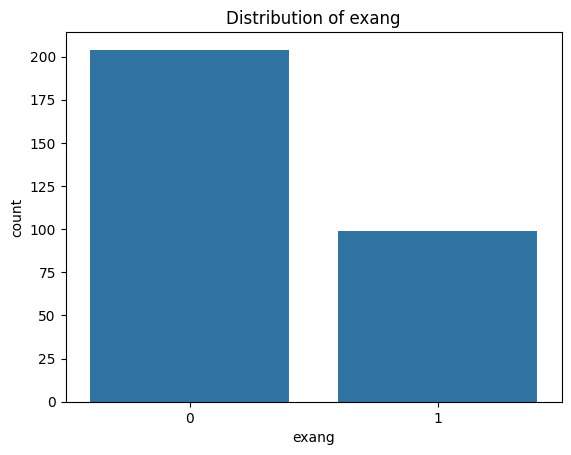

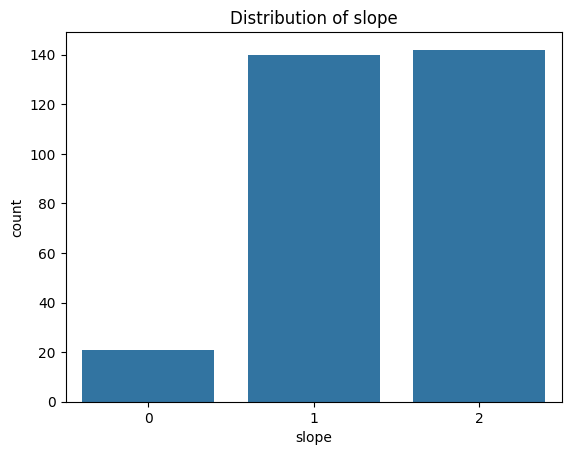

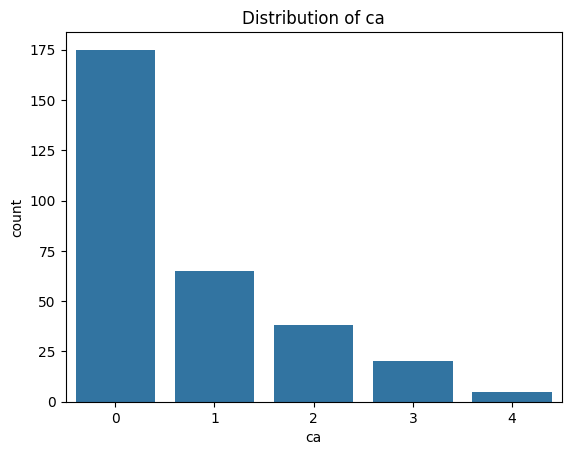

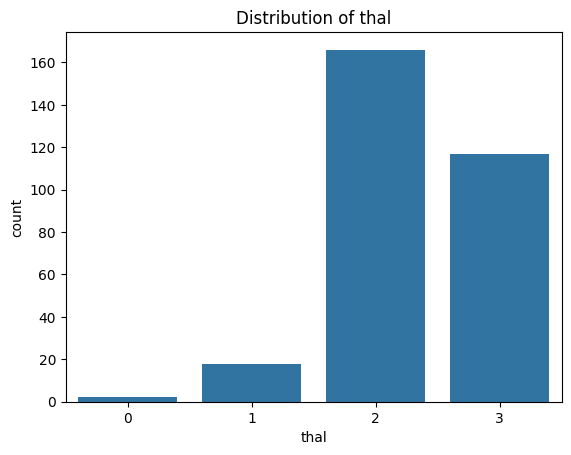

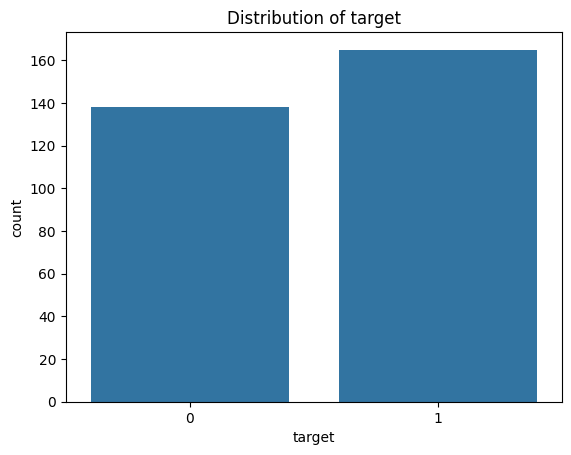

Universal analysis numerical variables


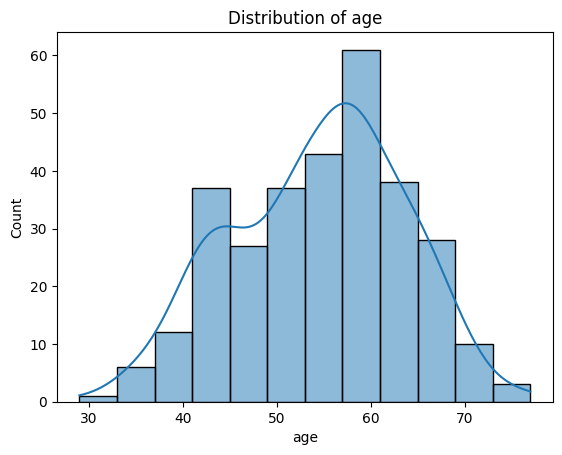

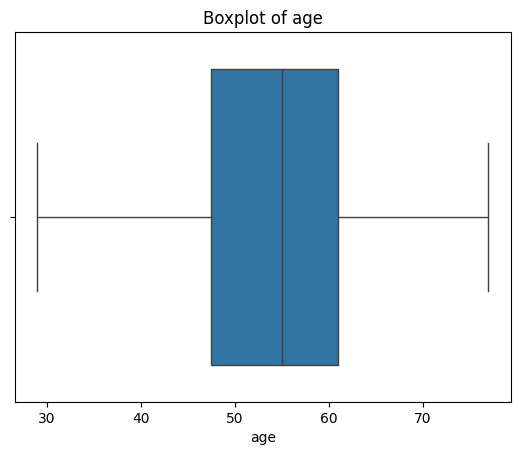

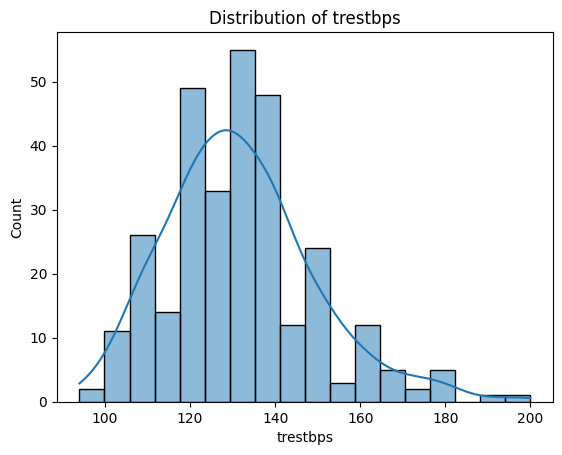

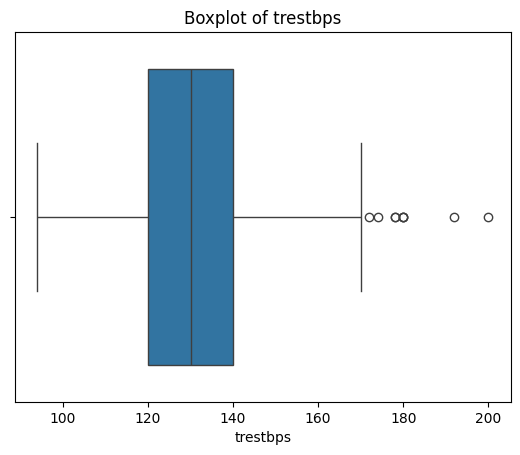

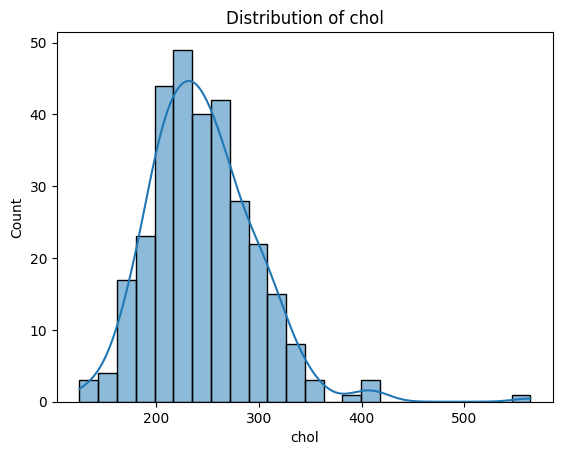

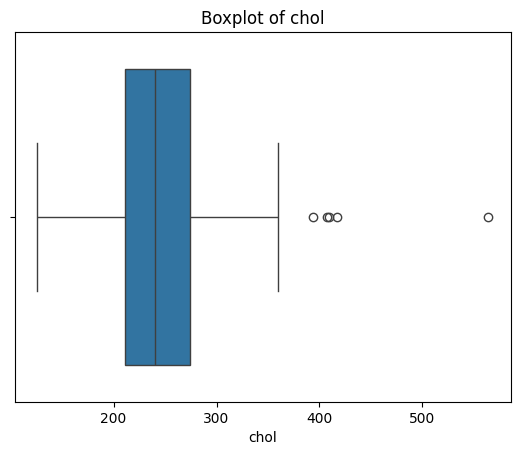

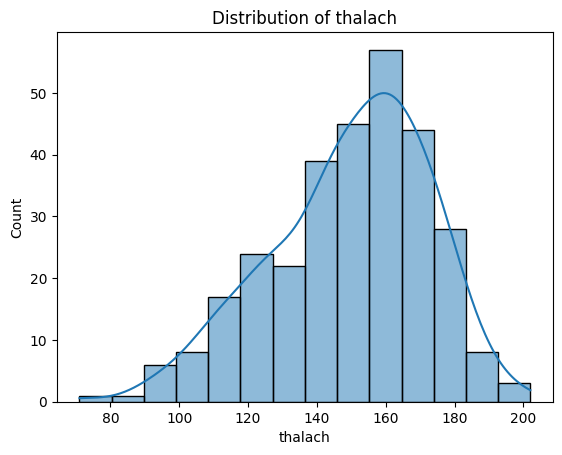

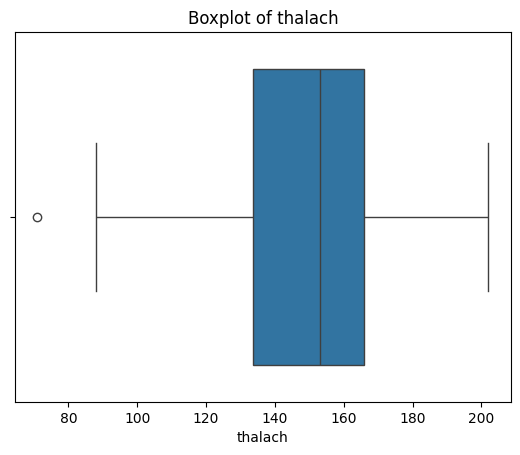

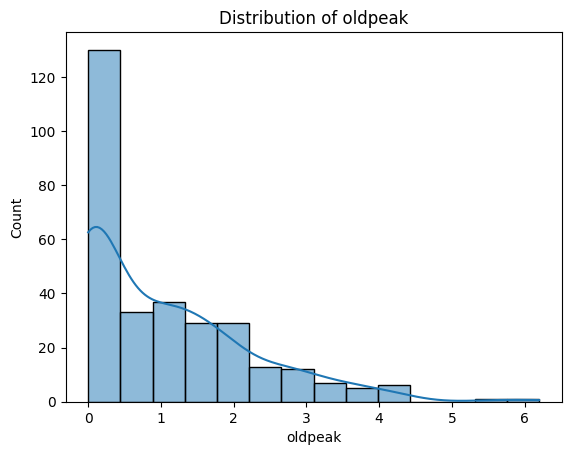

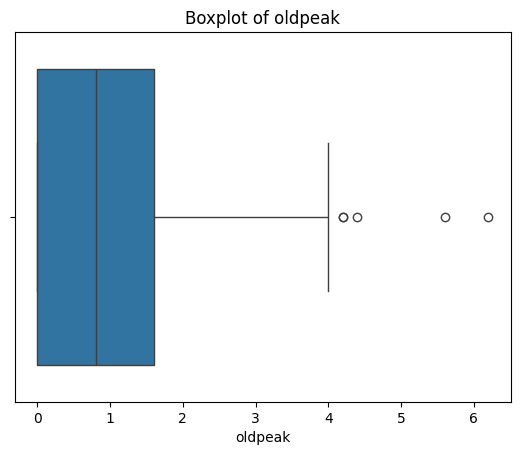

Bivariable analysis categorical variables vs target


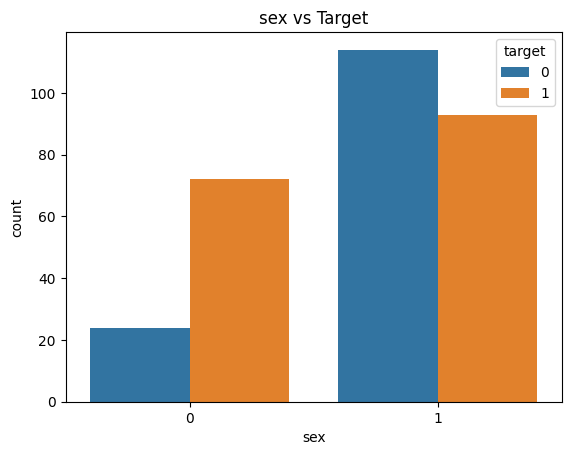

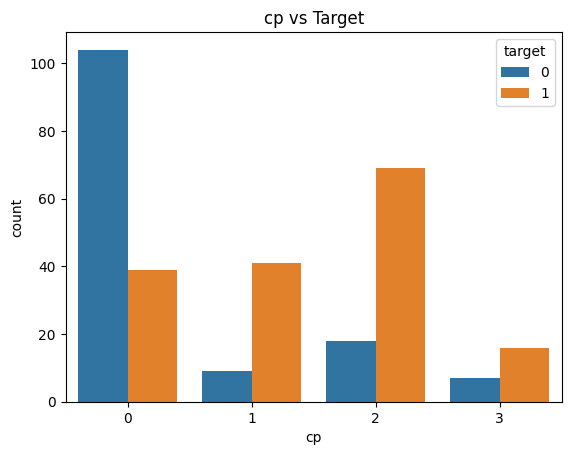

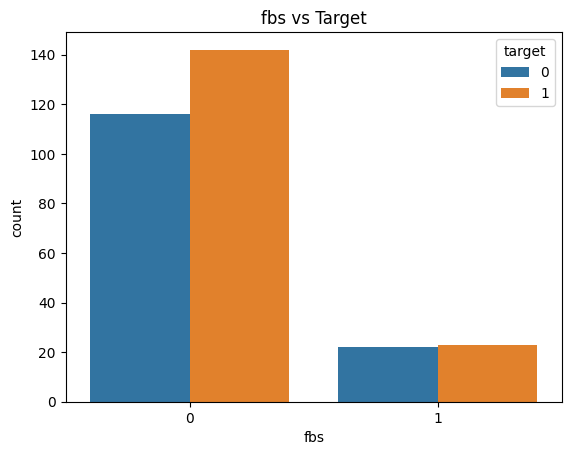

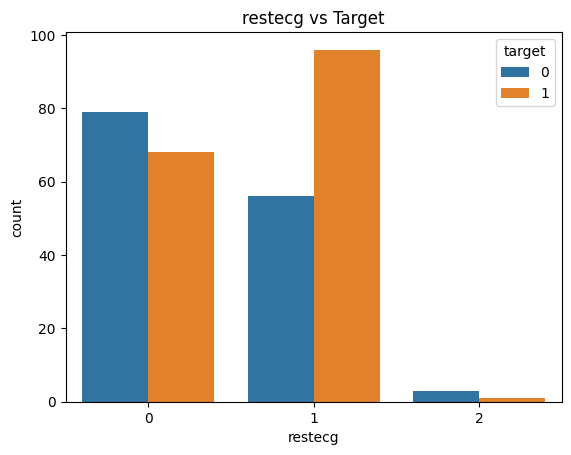

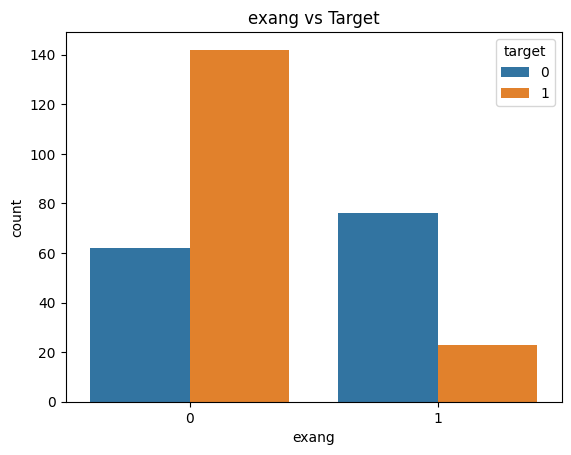

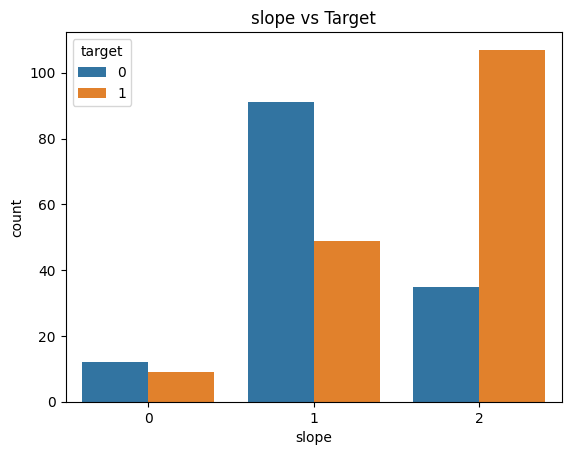

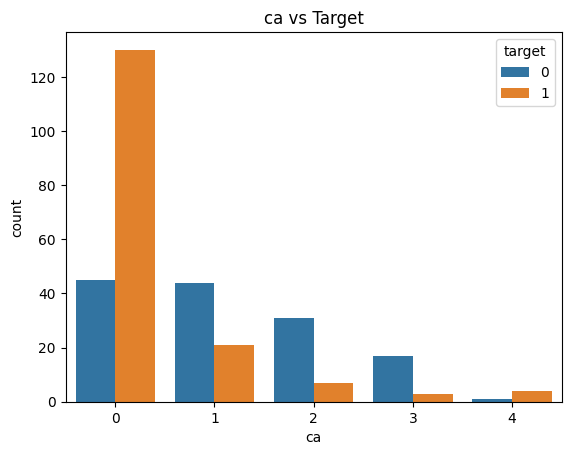

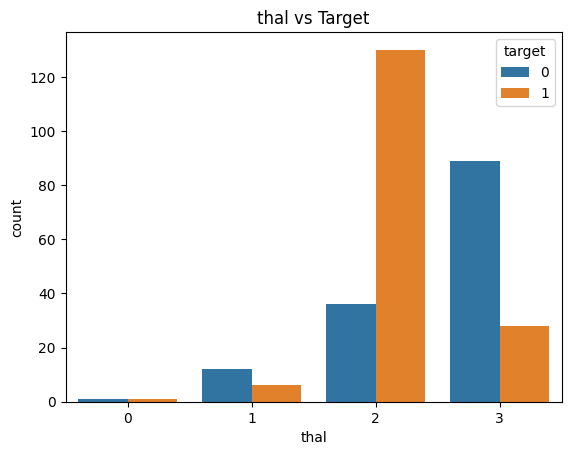

Bivariable analysis numerical variables vs target


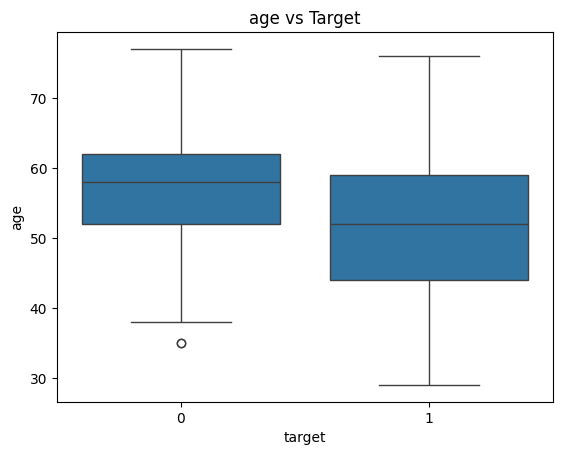

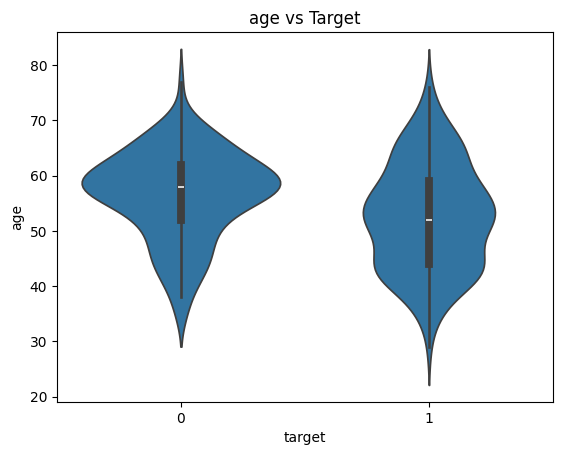

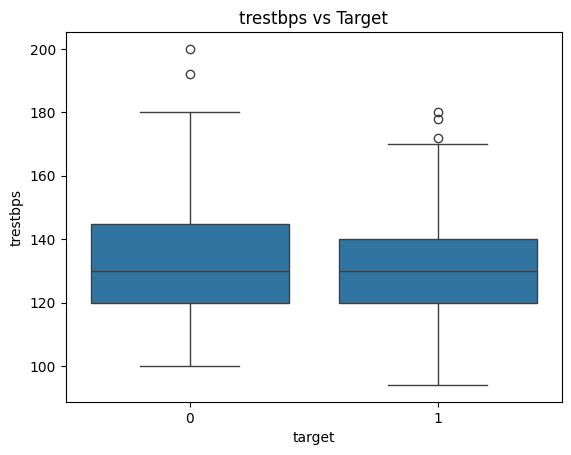

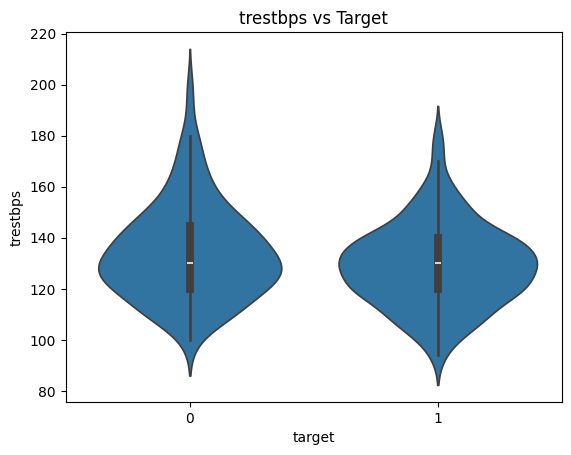

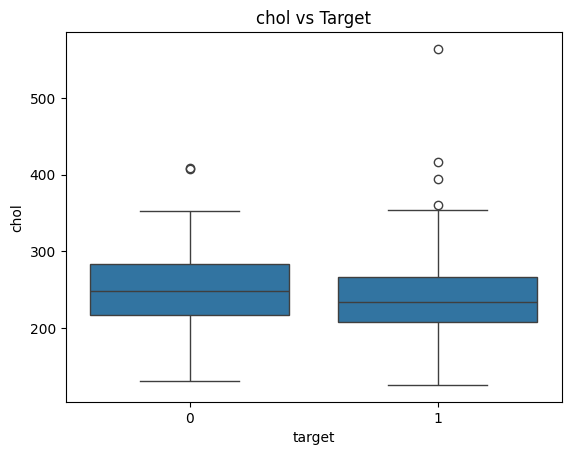

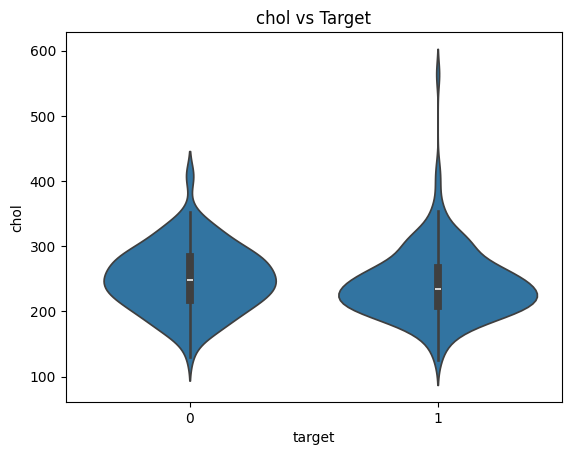

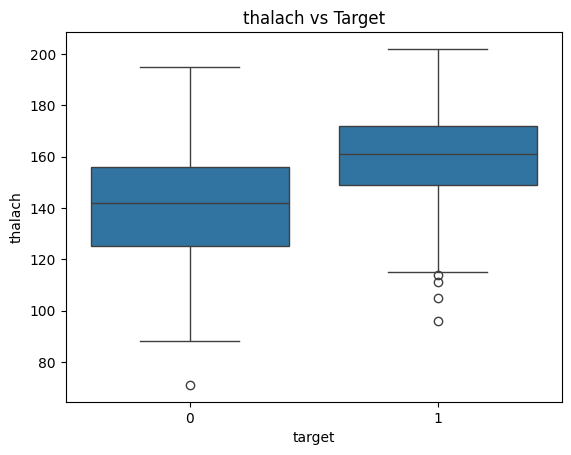

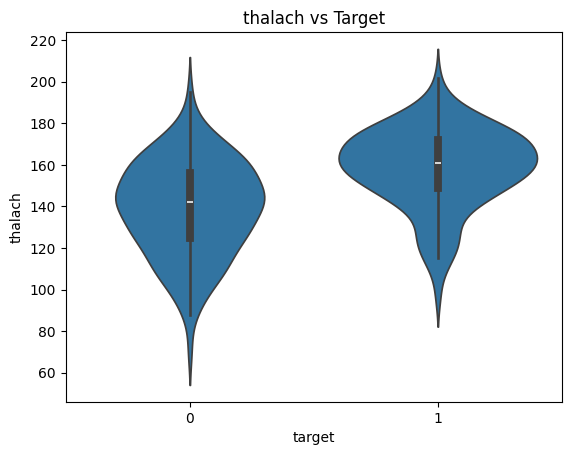

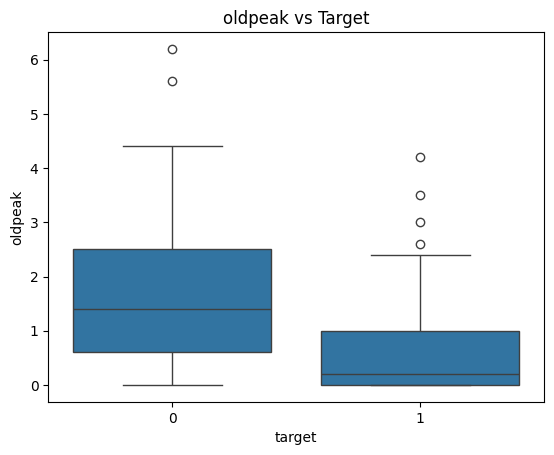

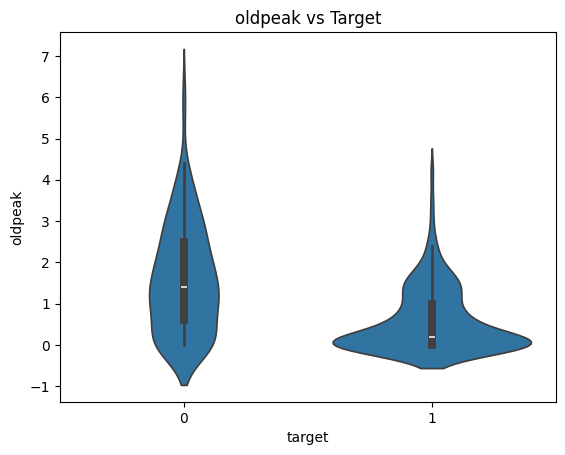

Pair plot


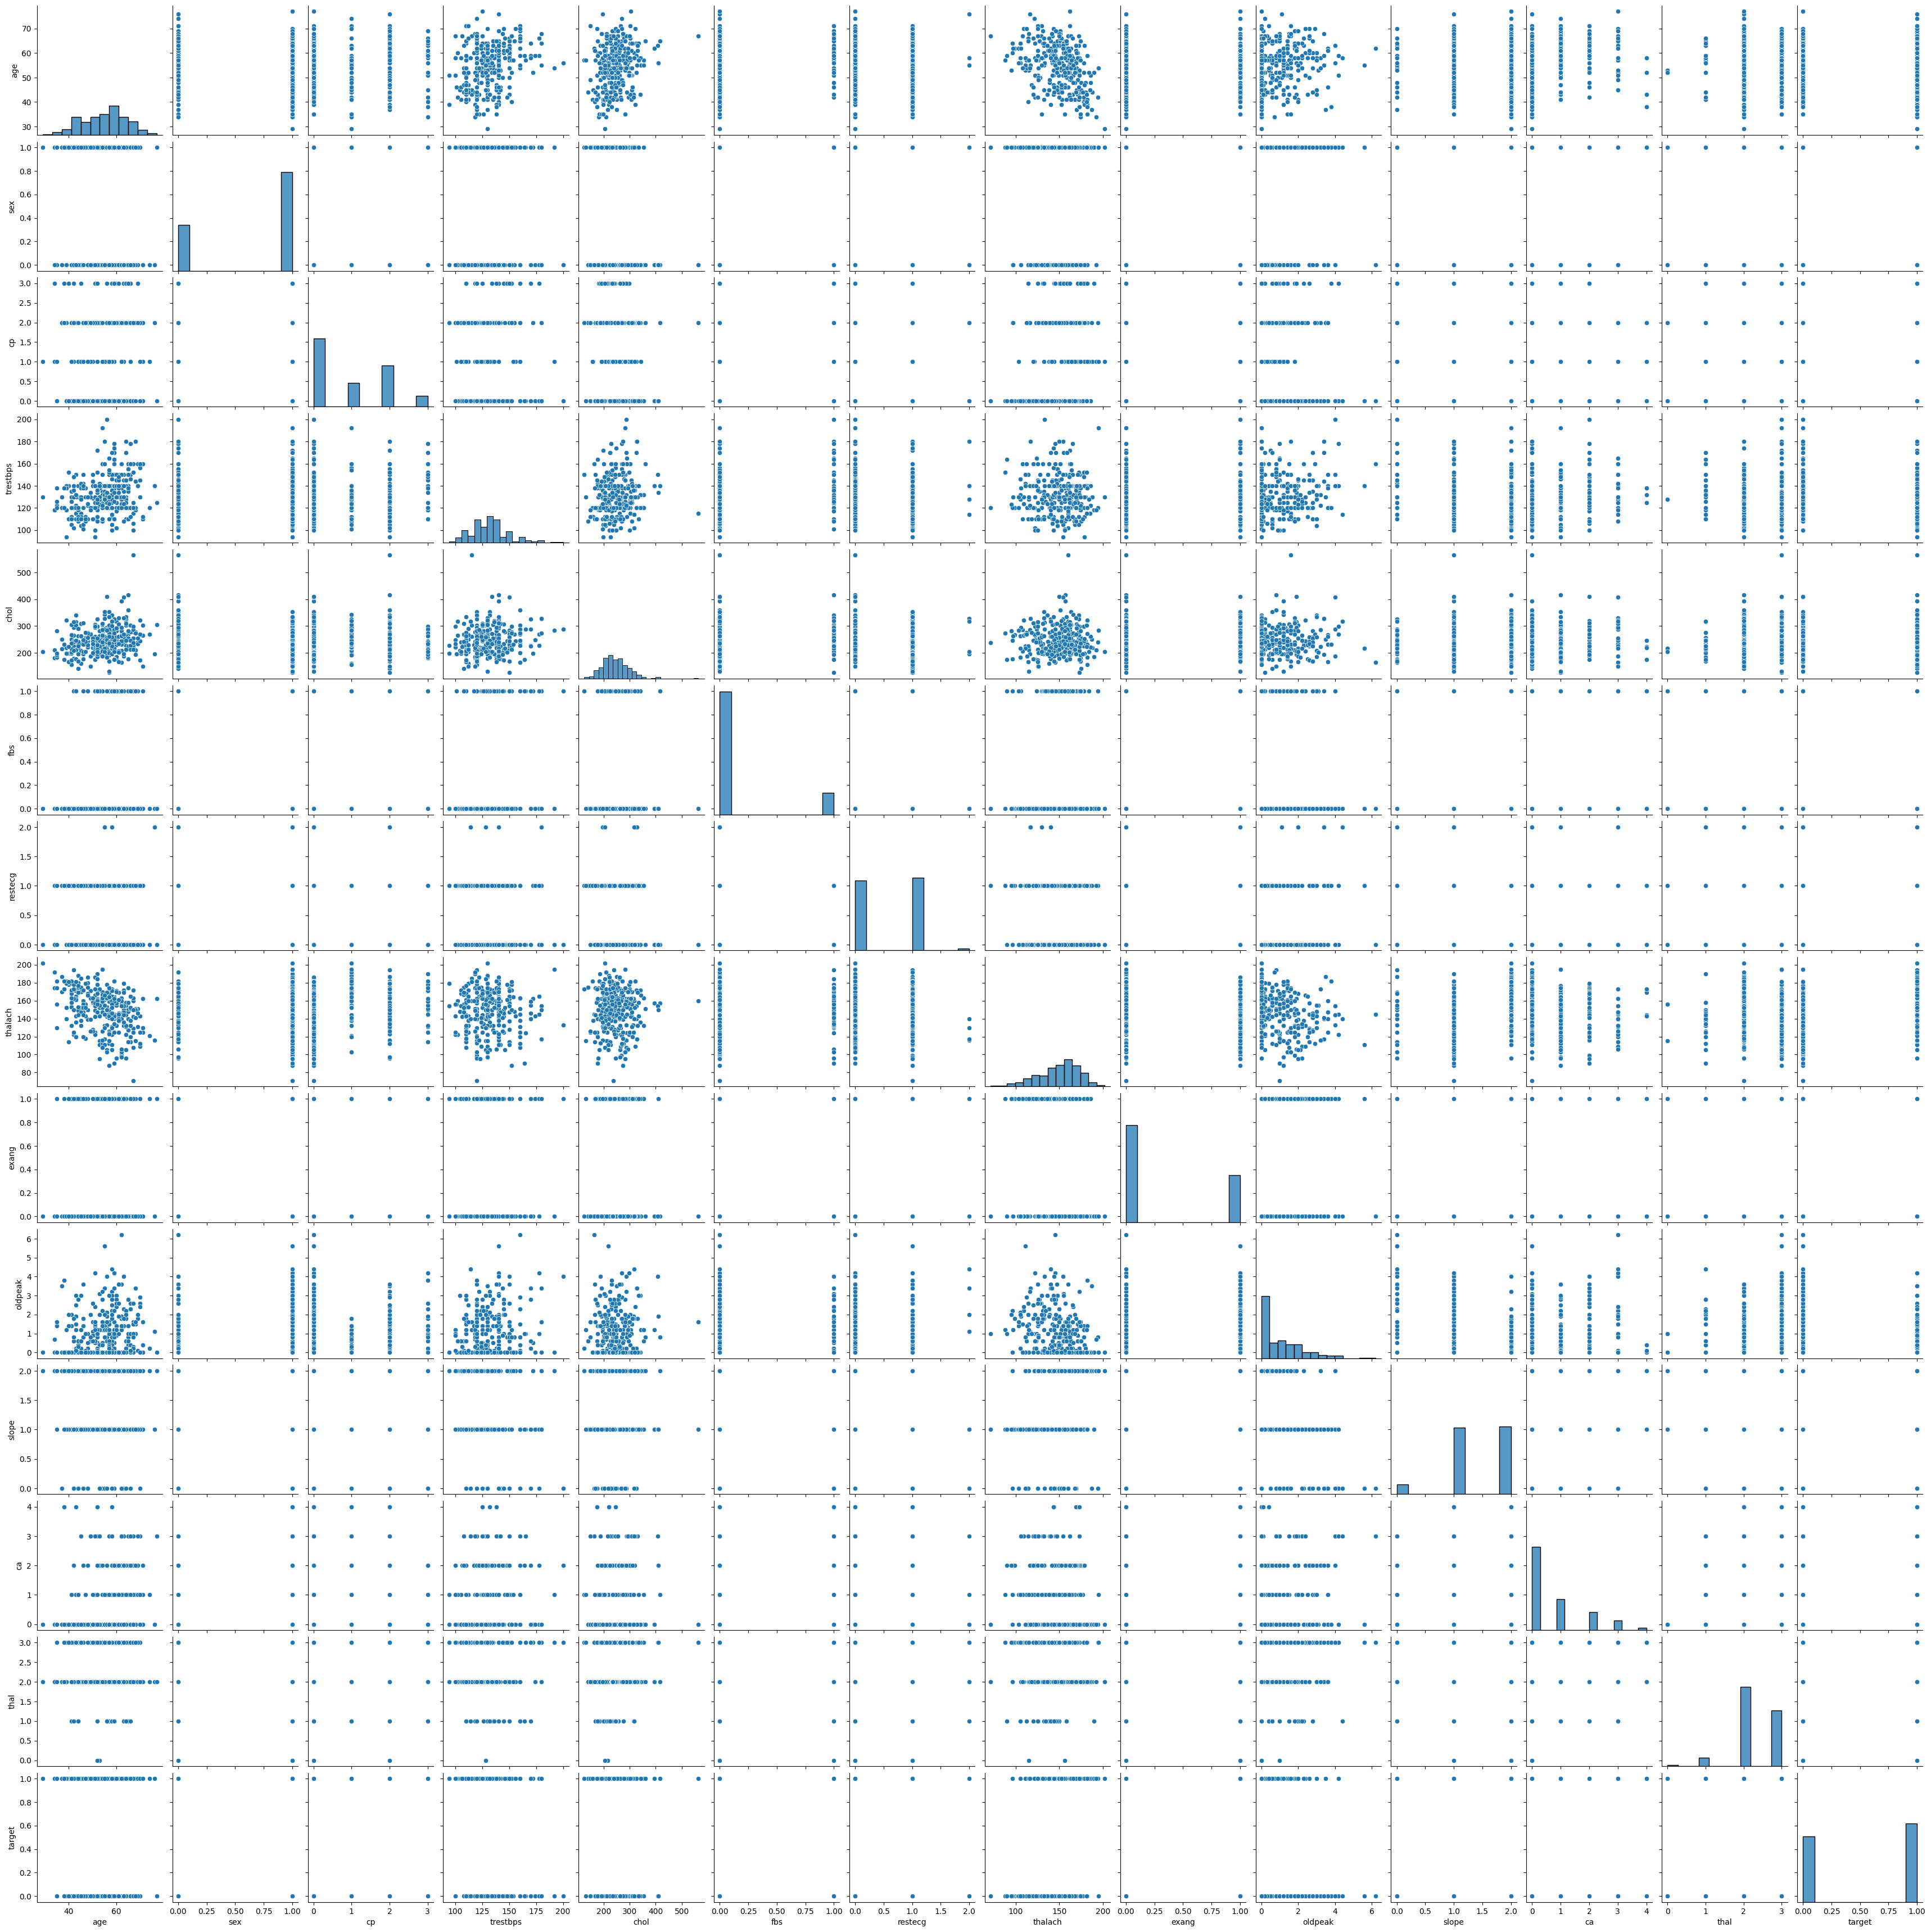

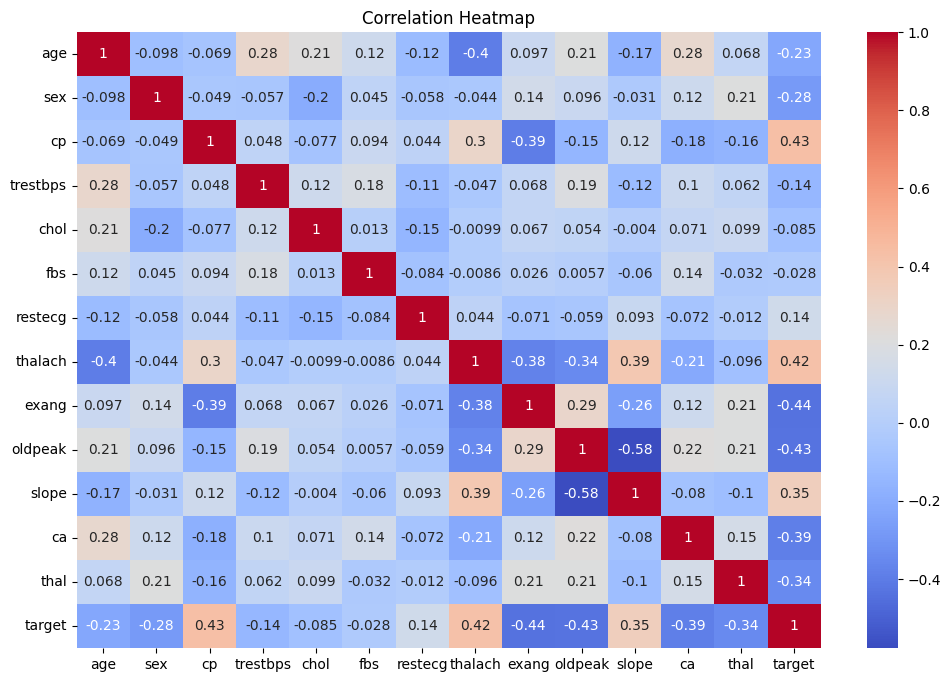

Group by stats
              age       sex        cp    trestbps        chol       fbs  \
target                                                                    
0       56.601449  0.826087  0.478261  134.398551  251.086957  0.159420   
1       52.496970  0.563636  1.375758  129.303030  242.230303  0.139394   

         restecg     thalach     exang   oldpeak     slope        ca      thal  
target                                                                          
0       0.449275  139.101449  0.550725  1.585507  1.166667  1.166667  2.543478  
1       0.593939  158.466667  0.139394  0.583030  1.593939  0.363636  2.121212  
Outlayers using IQR
Outliers in age:
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []
Outliers in trestbps:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
8     52    1   2       172   199    1        1      162      0      0.5   
101   59    1   3  

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = pd.read_csv('heart.csv')

# Basic Information
print("Basic info")
print(data.info())
print(data.describe())

# Missing Values
print("Missing values")
print(data.isnull().sum())

# Univariate Analysis - Categorical Variables
print("Universal analysis categorical variables")
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
for col in categorical_columns:
    sns.countplot(x=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.show()

# Univariate Analysis - Numerical Variables
print("Universal analysis numerical variables")
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for col in numerical_columns:
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Bivariate Analysis - Categorical vs Target
print("Bivariable analysis categorical variables vs target")
for col in categorical_columns[:-1]:  # exclude target itself
    sns.countplot(x=col, hue='target', data=data)
    plt.title(f'{col} vs Target')
    plt.show()

# Bivariate Analysis - Numerical vs Target
print("Bivariable analysis numerical variables vs target")
for col in numerical_columns:
    sns.boxplot(x='target', y=col, data=data)
    plt.title(f'{col} vs Target')
    plt.show()
    sns.violinplot(x='target', y=col, data=data)
    plt.title(f'{col} vs Target')
    plt.show()

# Pair Plot
print('Pair plot')
sns.pairplot(data)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Groupby Statistics
print("Group by stats")
print(data.groupby('target').mean())

# Detecting Outliers using IQR
print("Outlayers using IQR")
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))]
    print(f'Outliers in {col}:')
    print(outliers)


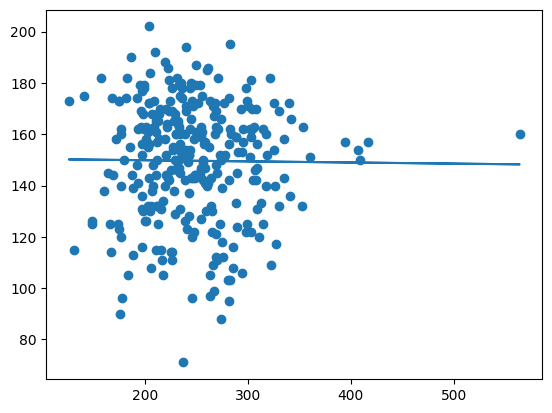

149.93793841245048


In [22]:
from scipy import stats
X = data['chol']
y = data['thalach']

slope, intercept, r, p, std_err = stats.linregress(X, y)
# r is the coeffisient of correletion

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, X))
plt.scatter(X, y)
plt.plot(X, mymodel)
plt.show()
thalach = myfunc(180)
print(thalach)